In [82]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt
import sys

My posterior on mu p(mu|x) is proportional to exp(-mu^2/2)*produttoria(-(x-mu)^2/2)

In [122]:
w=0.5;
clutter_mean=0;
clutter_var=5;
prior_mean=0;
prior_var=3;
var=1;

In [123]:
n_samples=20
x=np.zeros(n_samples)
#mean=np.random.normal(loc=prior_mean, scale=prior_var)
mean=2
print("the value of the true mean is: ",mean)
for i in range(n_samples):
    coin=np.random.random()
    if coin<w:
        x[i]=np.random.normal(loc=clutter_mean, scale=clutter_var)
    else:
        x[i]=np.random.normal(loc=mean, scale=var)
x;

the value of the true mean is:  2


In [124]:
def unnormalized(x, mu, prior_var, clutter_var, var):
    n=len(x)
    #exponent= -1*(mu*mu)/(2*prior_var) + mu/clutter_var*(sum(x)) - n*mu*mu/(2*clutter_var);
    first=np.exp(-1*(mu*mu)/(2*prior_var))
    res=1;
    for i in range(n):
        factor=(2*np.pi*var)**(-1/2)*np.exp(-0.5*(x[i]-mu)**2) + (2*np.pi*clutter_var)**(-1/2)*np.exp(-x[i]*x[i]/(2*clutter_var))
        res=res*factor
        
    return first*res

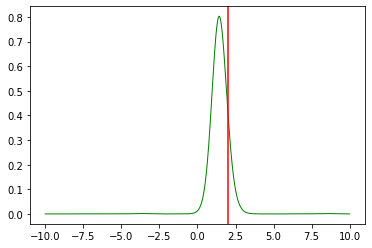

In [125]:
mu=np.linspace(-10,10,10000)
y_mu=np.zeros(10000)
for i in range(10000):
    y_mu[i] = unnormalized(x, mu[i], prior_var, clutter_var, var)
#y_mu=unnormalized(x, mu, prior_var, clutter_var)
normalizer = simps(y_mu, mu)
y_mu_normalized=y_mu/normalizer
plt.plot(mu, y_mu_normalized, color="green", linewidth=1.0)
plt.axvline(x=2, color="red", label="true generating value")



In [71]:
normalizer = simps(y_mu, mu)

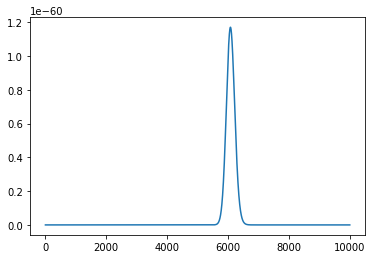

In [91]:
plt.plot(y_mu)